In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Set the path to your directory
directory_path = '/content/drive/My Drive/DATA 207 Datasets/'

# Change the current working directory to the specified directory
os.chdir(directory_path)

# List files in the directory
files = os.listdir()
print(files)



['music_genre.csv', 'dataset.csv']


In [4]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

In [5]:
data1.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [6]:
import pandas as pd

# data1 'tempo' column
# Convert 'tempo' column to numeric
data1['tempo'] = pd.to_numeric(data1['tempo'], errors='coerce')

# Calculate the average tempo
average_tempo = data1['tempo'].mean()

# Fill missing values in 'tempo' column with the average tempo
data1['tempo'] = data1['tempo'].fillna(average_tempo)
#data1.isna().sum()



# data2 'tempo' column
# Convert 'tempo' column to numeric
data2['tempo'] = pd.to_numeric(data2['tempo'], errors='coerce')

# Calculate the average tempo
average_tempo = data2['tempo'].mean()

# Fill missing values in 'tempo' column with the average tempo
data2['tempo'] = data2['tempo'].fillna(average_tempo)

In [7]:
data2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Data Cleaning

## Cleaned data 1 "tempo" column

In [8]:
data1['tempo'] = data1['tempo'].replace({'\?': ''}, regex=True)

# Convert the 'Tempo' column to numeric
data1['tempo'] = pd.to_numeric(data1['tempo'], errors='coerce')

# Now 'Tempo' column contains values without "?"

print(len(data1[data1["tempo"] == "?"]))
print(len(data1))


0
50005


In [9]:
data1_cleaned = data1
data2_cleaned = data2

data1_cleaned = data1.dropna()
data1_cleaned.head()



,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [10]:
data2_cleaned = data2.dropna()
data2_cleaned

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [11]:
#data1_cleaned.isna().sum()
data2_cleaned.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# One Hot encoding -- converted categorical values to numerical values

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder()

#Data 1


#make key, mode into One Hot encoding
#music_genre into label encoding
onehot =OneHotEncoder(sparse=False)
onehot.fit(data1_cleaned[['key', 'mode']])
onehotencoded = onehot.transform(data1_cleaned[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1_cleaned[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
concat_data1 = pd.concat([data1_cleaned, onehotdf], axis=1)
# Drop the original categorical columns
df1_encoded = concat_data1.drop(columns = ['key', 'mode'], axis=1)

df1_encoded_cleaned = df1_encoded.dropna()
df1_encoded_cleaned

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.004680,0.652,-1.0,0.941,0.792000,0.115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.012700,0.622,218293.0,0.890,0.950000,0.124,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30097.0,Dillon Francis,Hurricane,28.0,0.003060,0.620,215613.0,0.755,0.011800,0.534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,62177.0,Dubloadz,Nitro,34.0,0.025400,0.774,166875.0,0.700,0.002530,0.157,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24907.0,What So Not,Divide & Conquer,32.0,0.004650,0.638,222369.0,0.587,0.909000,0.157,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,56911.0,Too $hort,Shake That Monkey,55.0,0.000577,0.937,278707.0,0.695,0.000032,0.295,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,20269.0,Unknown Mortal Orchestra,So Good at Being in Trouble,57.0,0.036300,0.829,230147.0,0.435,0.878000,0.119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,54580.0,Tee Grizzley,First Day Out,75.0,0.171000,0.587,254694.0,0.711,0.000000,0.125,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,64552.0,Logic,Growing Pains III,55.0,0.474000,0.514,246773.0,0.730,0.000000,0.511,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
df1_encoded_cleaned.isna().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
key_A               0
key_A#              0
key_B               0
key_C               0
key_C#              0
key_D               0
key_D#              0
key_E               0
key_F               0
key_F#              0
key_G               0
key_G#              0
mode_Major          0
mode_Minor          0
dtype: int64

In [14]:
#Data 2

#make key, mode into One Hot encoding
#music_genre into label encoding
onehot =OneHotEncoder(sparse=False)
onehot.fit(data2_cleaned[['key','mode','explicit' ]])
onehotencoded = onehot.transform(data2_cleaned[['key', 'mode', 'explicit']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data2_cleaned[['key', 'mode', 'explicit']].columns) for cat in onehot.categories_[i]]
onehotdf_2 = pd.DataFrame(onehotencoded, columns=categorical_columns)
concat_data2 = pd.concat([data2_cleaned, onehotdf_2], axis=1)
# Drop the original categorical columns
df2_encoded = concat_data2.drop(columns = ['key', 'mode', 'explicit'], axis=1)

df2_encoded_cleaned = df2_encoded.dropna()
df2_encoded_cleaned

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,loudness,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_False,explicit_True
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,0.676,0.4610,-6.746,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,0.420,0.1660,-17.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,0.438,0.3590,-9.734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,0.266,0.0596,-18.515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,0.618,0.4430,-9.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,113994.0,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22.0,305454.0,0.331,0.1710,-15.668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
113995,113995.0,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21.0,384999.0,0.172,0.2350,-16.393,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
113996,113996.0,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22.0,385000.0,0.174,0.1170,-18.318,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
113997,113997.0,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22.0,271466.0,0.629,0.3290,-10.895,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0



# Changing Y into numerical values

In [15]:


labelencoder = LabelEncoder()
# data1['key_num'] = onehot_encoder.fit_transform(data1[['key']]).toarray()
# data1['mode_num'] = onehot_encoder.fit_transform(data1[['mode']]).toarray()
df1_encoded_cleaned['music_genre_num'] = labelencoder.fit_transform(df1_encoded_cleaned['music_genre']) #remain using labelencoder for Y variable
#data1_cleaned = data1_cleaned.dropna(inplace=True)




# data2['explicit_num'] = labelencoder.fit_transform(data2[['explicit']])
df2_encoded_cleaned['track_genre_num'] = labelencoder.fit_transform(df2_encoded_cleaned['track_genre'])
df2_encoded_cleaned

<ipython-input-15-9280f9b73a9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_encoded_cleaned['music_genre_num'] = labelencoder.fit_transform(df1_encoded_cleaned['music_genre']) #remain using labelencoder for Y variable
<ipython-input-15-9280f9b73a9d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_encoded_cleaned['track_genre_num'] = labelencoder.fit_transform(df2_encoded_cleaned['track_genre'])


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,loudness,...,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_False,explicit_True,track_genre_num
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,0.676,0.4610,-6.746,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,0.420,0.1660,-17.235,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,0.438,0.3590,-9.734,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,0.266,0.0596,-18.515,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,0.618,0.4430,-9.681,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,113994.0,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22.0,305454.0,0.331,0.1710,-15.668,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,113
113995,113995.0,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21.0,384999.0,0.172,0.2350,-16.393,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,113
113996,113996.0,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22.0,385000.0,0.174,0.1170,-18.318,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,113
113997,113997.0,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22.0,271466.0,0.629,0.3290,-10.895,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,113


In [16]:
df2_encoded_cleaned.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
key_0               0
key_1               0
key_2               0
key_3               0
key_4               0
key_5               0
key_6               0
key_7               0
key_8               0
key_9               0
key_10              0
key_11              0
mode_0              0
mode_1              0
explicit_False      0
explicit_True       0
track_genre_num     0
dtype: int64

## Dropped missing values and unnecessary categorical columns

In [17]:
df1_encoded_cleaned_dropped = df1_encoded_cleaned.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date', 'music_genre'])
df1_encoded_cleaned_dropped

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,music_genre_num
0,27.0,0.004680,0.652,-1.0,0.941,0.792000,0.115,-5.201,0.0748,100.889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
1,31.0,0.012700,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.002,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
2,28.0,0.003060,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5
3,34.0,0.025400,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
4,32.0,0.004650,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,55.0,0.000577,0.937,278707.0,0.695,0.000032,0.295,-6.932,0.1340,99.997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
49996,57.0,0.036300,0.829,230147.0,0.435,0.878000,0.119,-10.136,0.0515,103.816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
49997,75.0,0.171000,0.587,254694.0,0.711,0.000000,0.125,-6.330,0.4200,98.008,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
49998,55.0,0.474000,0.514,246773.0,0.730,0.000000,0.511,-8.491,0.3870,167.655,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6


In [18]:
df1_encoded_cleaned_dropped.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
key_A               0
key_A#              0
key_B               0
key_C               0
key_C#              0
key_D               0
key_D#              0
key_E               0
key_F               0
key_F#              0
key_G               0
key_G#              0
mode_Major          0
mode_Minor          0
music_genre_num     0
dtype: int64

In [19]:
df2_encoded_cleaned_dropped = df2_encoded_cleaned.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'])
df2_encoded_cleaned_dropped

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_False,explicit_True,track_genre_num
0,73.0,230666.0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,55.0,149610.0,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,57.0,210826.0,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,71.0,201933.0,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,82.0,198853.0,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22.0,305454.0,0.331,0.1710,-15.668,0.0350,0.9200,0.022900,0.0679,0.3270,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,113
113995,21.0,384999.0,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,113
113996,22.0,385000.0,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,113
113997,22.0,271466.0,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,113


In [20]:
df2_encoded_cleaned_dropped.isna().sum()

popularity          0
duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
key_0               0
key_1               0
key_2               0
key_3               0
key_4               0
key_5               0
key_6               0
key_7               0
key_8               0
key_9               0
key_10              0
key_11              0
mode_0              0
mode_1              0
explicit_False      0
explicit_True       0
track_genre_num     0
dtype: int64

In [21]:
# Split data into features and target
columns_to_keep = df1_encoded_cleaned_dropped.columns.difference(['music_genre_num'])
X = df1_encoded_cleaned_dropped[columns_to_keep]
y = df1_encoded_cleaned_dropped['music_genre_num']


num_classes = len(df1_encoded_cleaned_dropped['music_genre_num'].unique())
print("Number of classes:", num_classes)


Number of classes: 10


In [22]:
num_classes = len(df2_encoded_cleaned_dropped['track_genre_num'].unique())
print("Number of classes:", num_classes)

Number of classes: 114


In [23]:
print(df1_encoded_cleaned_dropped['music_genre_num'].dtype)
print(df1_encoded_cleaned_dropped['music_genre_num'].unique())



int64
[5 1 7 0 4 8 2 9 3 6]


# Transformer Model Baseline -- data1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader

# Split data into features and target
X = df1_encoded_cleaned_dropped.drop(columns=['music_genre_num'])  # Exclude target column
y = df1_encoded_cleaned_dropped['music_genre_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.int64)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define model architecture
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=hidden_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim,
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x.squeeze(1)

# Adjusting dimensions to ensure embed_dim is divisible by num_heads
input_dim = X.shape[1]
output_dim = 114
num_heads = 8
hidden_dim = 512
num_layers = 3
dropout = 0.1

# Instantiate model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Train model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)



    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)
    val_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss {train_loss:.7f} accuracy {train_accuracy:.7f}")
    print(f"Val   loss {test_loss:.7f} accuracy {test_accuracy:.7f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/5
Train loss 2.3578872 accuracy 0.0991599
Val   loss 2.3179360 accuracy 0.1027103
Epoch 2/5
Train loss 2.3236991 accuracy 0.0974347
Val   loss 2.3144543 accuracy 0.0947095
Epoch 3/5
Train loss 2.3120693 accuracy 0.0987349
Val   loss 2.3149541 accuracy 0.0947095
Epoch 4/5
Train loss 2.3081996 accuracy 0.1012601
Val   loss 2.3076936 accuracy 0.0947095
Epoch 5/5
Train loss 2.3066860 accuracy 0.1000350
Val   loss 2.3057200 accuracy 0.0947095


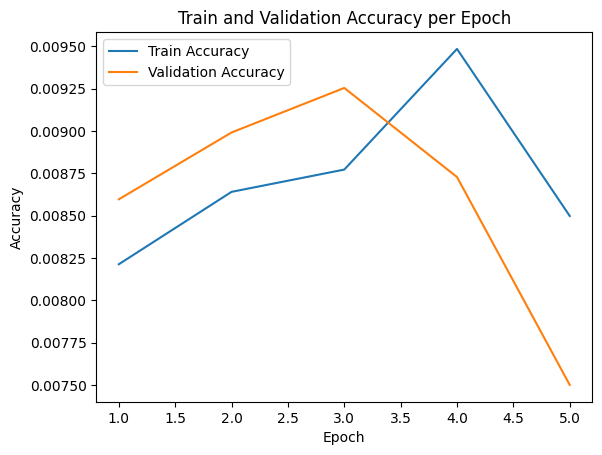

In [ ]:
import matplotlib.pyplot as plt

# Plot the graph
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy per Epoch')
plt.legend()
plt.show()


# Transformer Model Baseline -- data2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader

# Split data into features and target
X = df2_encoded_cleaned_dropped.drop(columns=['track_genre_num'])  # Exclude target column
y = df2_encoded_cleaned_dropped['track_genre_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.int64)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define model architecture
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=hidden_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim,
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x.squeeze(1)

# Adjusting dimensions to ensure embed_dim is divisible by num_heads
input_dim = X.shape[1]
output_dim = 114
num_heads = 8
hidden_dim = 512
num_layers = 3
dropout = 0.1

# Instantiate model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Train model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)


    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)
    val_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss {train_loss:.7f} accuracy {train_accuracy:.7f}")
    print(f"Val   loss {test_loss:.7f} accuracy {test_accuracy:.7f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/5
Train loss 4.7895087 accuracy 0.0082129
Val   loss 4.7574063 accuracy 0.0085965
Epoch 2/5
Train loss 4.7480230 accuracy 0.0086405
Val   loss 4.7440438 accuracy 0.0089912
Epoch 3/5
Train loss 4.7420022 accuracy 0.0087721
Val   loss 4.7409478 accuracy 0.0092544
Epoch 4/5
Train loss 4.7407748 accuracy 0.0094849
Val   loss 4.7398903 accuracy 0.0087281
Epoch 5/5
Train loss 4.7399979 accuracy 0.0084980
Val   loss 4.7385654 accuracy 0.0075000


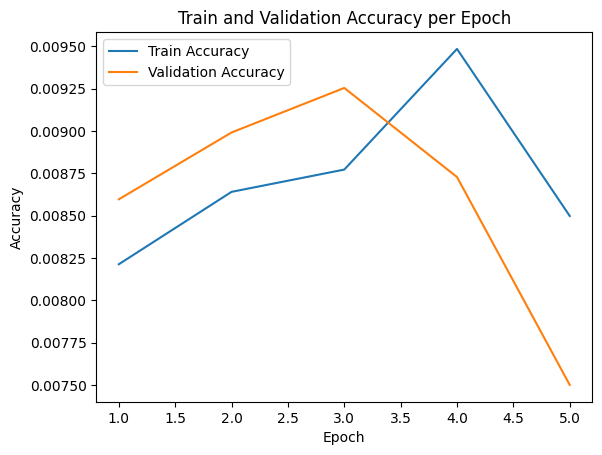

In [ ]:
import matplotlib.pyplot as plt

# Plot the graph
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy per Epoch')
plt.legend()
plt.show()


# Advanced Model: where changed?

This revised version includes the following optimizations:

Normalization: Standardize input features using StandardScaler for better convergence.

Dynamic Output Dimension: Dynamically set the output dimension based on the number of unique classes in the target variable.

Adjusted dim_feedforward: Increased the dim_feedforward parameter in the TransformerEncoderLayer for potentially better representation learning.

Class Weights: Compute class weights and apply them to the loss function to handle class imbalance.

Increased Epochs: Increased the number of training epochs to allow for longer training and potentially better convergence.


# Transformer Model Improved -- data1

## data 1 feature selection

In [ ]:


# Calculate correlation matrix
correlation_matrix = df1_encoded_cleaned_dropped.corr()

# Extract correlation values with the target variable
correlation_with_target = correlation_matrix['music_genre_num'].abs().sort_values(ascending=False)

# Print the correlation values
print(correlation_with_target)


music_genre_num     1.000000
popularity          0.502118
danceability        0.303428
speechiness         0.190530
instrumentalness    0.110407
loudness            0.102515
acousticness        0.097937
valence             0.075082
key_C#              0.049679
mode_Major          0.039692
mode_Minor          0.039692
energy              0.034747
key_A#              0.030513
duration_ms         0.028507
key_G               0.027734
liveness            0.025213
key_G#              0.022600
key_D               0.022521
tempo               0.021601
key_D#              0.014674
key_A               0.013932
key_E               0.013055
key_C               0.012412
key_B               0.005369
key_F               0.003966
key_F#              0.003204
Name: music_genre_num, dtype: float64


## improved model data 1 with L2 and feature selection (the highest absolute correlation values)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Assuming df1_encoded_cleaned_dropped contains the original dataset

# Selecting relevant features
relevant_features = ['popularity', 'danceability', 'speechiness', 'instrumentalness', 'loudness', 'acousticness']
X = df1_encoded_cleaned_dropped[relevant_features]
y = df1_encoded_cleaned_dropped['music_genre_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to tensor
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define model architecture with L2 regularization
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=hidden_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim * 4,
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.l2_regularization = nn.Linear(hidden_dim, hidden_dim)  # L2 regularization layer

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        x = self.dropout(x)
        #x = self.l2_regularization(x)  # Applying L2 regularization
        return x.squeeze(1)

# Adjusting dimensions to ensure embed_dim is divisible by num_heads
input_dim = X_train.shape[1]
output_dim = len(df1_encoded_cleaned_dropped['music_genre_num'].unique())  # Dynamically set output_dim
num_heads = 8
hidden_dim = 512
num_layers = 3
dropout = 0.1

# Instantiate model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout)

# Compute unique classes in the entire dataset
unique_classes = torch.unique(torch.cat((y_train, y_test), dim=0))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=unique_classes.numpy(), y=y_train.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
# Define optimizer with L2 regularization
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)


# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Train model
# Train model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)

    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)
    val_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss {train_loss:.7f} accuracy {train_accuracy:.7f}")
    print(f"Val   loss {test_loss:.7f} accuracy {test_accuracy:.7f}")



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10
Train loss 1.4850932 accuracy 0.4460696
Val   loss 1.3236436 accuracy 0.5028503
Epoch 2/10
Train loss 1.4211544 accuracy 0.4662216
Val   loss 1.3353931 accuracy 0.4888489
Epoch 3/10
Train loss 1.4232043 accuracy 0.4669717
Val   loss 1.3145529 accuracy 0.4979498
Epoch 4/10
Train loss 1.4013639 accuracy 0.4737724
Val   loss 1.3002996 accuracy 0.5097510
Epoch 5/10
Train loss 1.3974236 accuracy 0.4749225
Val   loss 1.3099071 accuracy 0.5017502
Epoch 6/10
Train loss 1.3937568 accuracy 0.4736224
Val   loss 1.2879273 accuracy 0.5041504
Epoch 7/10
Train loss 1.3877345 accuracy 0.4768727
Val   loss 1.3003910 accuracy 0.4971497
Epoch 8/10
Train loss 1.3813889 accuracy 0.4812481
Val   loss 1.2822335 accuracy 0.5077508
Epoch 9/10
Train loss 1.3817808 accuracy 0.4788979
Val   loss 1.2897220 accuracy 0.5067507
Epoch 10/10
Train loss 1.3806878 accuracy 0.4765477
Val   loss 1.2831718 accuracy 0.5028503


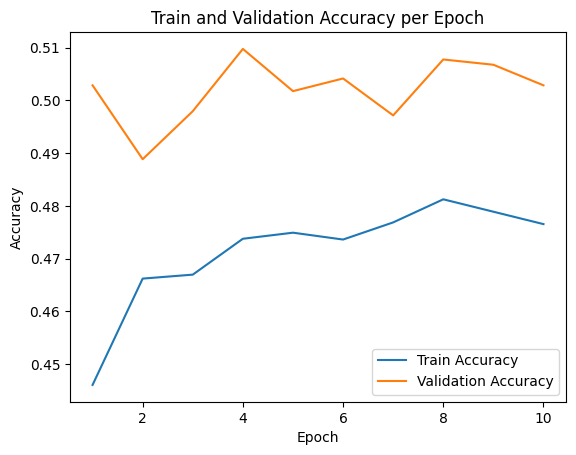

In [ ]:
import matplotlib.pyplot as plt

# Plot the graph
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy per Epoch')
plt.legend()
plt.show()



# Transformer Model Improved -- data2

## data 2 feature selection

In [24]:


# Calculate correlation matrix
correlation_matrix = df2_encoded_cleaned_dropped.corr()

# Extract correlation values with the target variable
correlation_with_target = correlation_matrix['track_genre_num'].abs().sort_values(ascending=False)

# Print the correlation values
print(correlation_with_target)


track_genre_num     1.000000
speechiness         0.085144
acousticness        0.077199
instrumentalness    0.070656
energy              0.056166
explicit_False      0.054832
explicit_True       0.054832
valence             0.053292
liveness            0.033577
duration_ms         0.032824
popularity          0.032704
loudness            0.027227
tempo               0.025906
key_1               0.021836
time_signature      0.021010
key_0               0.019017
key_6               0.012753
key_8               0.009290
key_7               0.008125
key_9               0.007115
mode_1              0.005244
mode_0              0.005244
key_5               0.005182
key_2               0.004916
key_10              0.004570
key_11              0.004544
danceability        0.003574
key_3               0.001896
key_4               0.000949
Name: track_genre_num, dtype: float64


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Split data into features and target
X = df2_encoded_cleaned_dropped.drop(columns=['track_genre_num'])  # Exclude target column
y = df2_encoded_cleaned_dropped['track_genre_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to tensor
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define model architecture
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=hidden_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim * 4,  # Increased dim_feedforward
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x.squeeze(1)

# Adjusting dimensions to ensure embed_dim is divisible by num_heads
input_dim = X_train.shape[1]
output_dim = len(df2_encoded_cleaned_dropped['track_genre_num'].unique())  # Dynamically set output_dim
num_heads = 8
hidden_dim = 512
num_layers = 3
dropout = 0.1

# Instantiate model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout)

# Compute unique classes in the entire dataset
unique_classes = torch.unique(torch.cat((y_train, y_test), dim=0))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=unique_classes.numpy(), y=y_train.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float32)




# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

# Train model
num_epochs = 10  # Increase number of epochs
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)

    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss {train_loss:.7f} accuracy {train_accuracy:.7f}")
    print(f"Val   loss {test_loss:.7f} accuracy {test_accuracy:.7f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10
Train loss 4.4909622 accuracy 0.0299129
Val   loss 4.4902075 accuracy 0.0265789
Epoch 2/10
Train loss 4.6553270 accuracy 0.0159762
Val   loss 4.7476586 accuracy 0.0094298
Epoch 3/10
Train loss 4.7120242 accuracy 0.0115792
Val   loss 4.7007953 accuracy 0.0150000
Epoch 4/10
Train loss 4.7037702 accuracy 0.0130047
Val   loss 4.7001186 accuracy 0.0129825


KeyboardInterrupt: 

## improved model data 2 with L2 and feature selection (the highest absolute correlation values)

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Split data into features and target
X = df2_encoded_cleaned_dropped.drop(columns=['track_genre_num'])  # Exclude target column
y = df2_encoded_cleaned_dropped['track_genre_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to tensor
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define model architecture
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=hidden_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim * 4,  # Increased dim_feedforward
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x.squeeze(1)

# Adjusting dimensions to ensure embed_dim is divisible by num_heads
input_dim = X_train.shape[1]
output_dim = len(df2_encoded_cleaned_dropped['track_genre_num'].unique())  # Dynamically set output_dim
num_heads = 8
hidden_dim = 512
num_layers = 3
dropout = 0.1

# Instantiate model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout)

# Compute unique classes in the entire dataset
unique_classes = torch.unique(torch.cat((y_train, y_test), dim=0))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=unique_classes.numpy(), y=y_train.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Define loss function and optimizer with L2 regularization
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight decay

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Train model
num_epochs = 10  # Increase number of epochs
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)

    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)
    val_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss {train_loss:.7f} accuracy {train_accuracy:.7f}")
    print(f"Val   loss {test_loss:.7f} accuracy {test_accuracy:.7f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10
Train loss 4.5035145 accuracy 0.0318538
Val   loss 4.5287349 accuracy 0.0199123
Epoch 2/10
Train loss 4.5048833 accuracy 0.0234435
Val   loss 4.4010076 accuracy 0.0287281
Epoch 3/10
Train loss 4.6100597 accuracy 0.0169631
Val   loss 4.6313468 accuracy 0.0164912
Epoch 4/10
Train loss 4.6489790 accuracy 0.0163600
Val   loss 4.6766808 accuracy 0.0139035
Epoch 5/10
Train loss 4.6848995 accuracy 0.0141012
Val   loss 4.6744840 accuracy 0.0149123
Epoch 6/10
Train loss 4.7032847 accuracy 0.0127196
Val   loss 4.6955508 accuracy 0.0114912
Epoch 7/10
Train loss 4.7070285 accuracy 0.0134104
Val   loss 4.6934801 accuracy 0.0139035
Epoch 8/10
Train loss 4.7007198 accuracy 0.0133227
Val   loss 4.6777616 accuracy 0.0155702
Epoch 9/10
Train loss 4.6933939 accuracy 0.0141012
Val   loss 4.6809181 accuracy 0.0147368
Epoch 10/10
Train loss 4.7226529 accuracy 0.0105485
Val   loss 4.7374747 accuracy 0.0093421


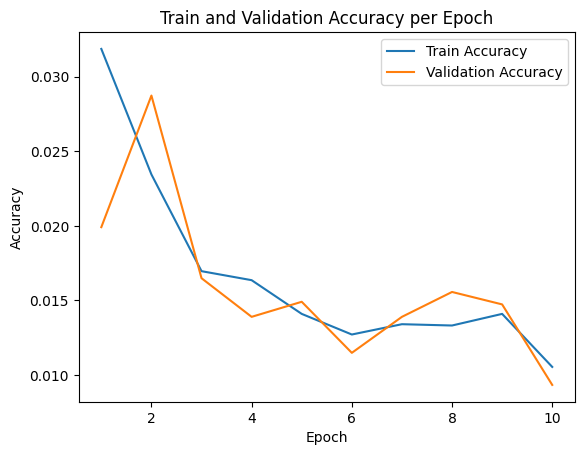

In [26]:
import matplotlib.pyplot as plt

# Plot the graph
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy per Epoch')
plt.legend()
plt.show()


## improved model data 2 2nd try

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import transformers

# Split data into features and target
X = df2_encoded_cleaned_dropped[['speechiness', 'acousticness', 'instrumentalness', 'energy', 'explicit_False', 'explicit_True', 'valence']]
y = df2_encoded_cleaned_dropped['track_genre_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to tensor
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define model architecture
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(
                d_model=hidden_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim * 4,  # Increased dim_feedforward
                dropout=dropout
            ) for _ in range(num_layers)
        ])
        self.transformer = nn.TransformerEncoder(self.transformer_layers, num_layers=num_layers)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        for layer in self.transformer_layers:
            x = layer(x)
        x = self.fc(x)
        return x.squeeze(1)


# Adjusting dimensions to ensure embed_dim is divisible by num_heads
input_dim = X_train.shape[1]
output_dim = len(df2_encoded_cleaned_dropped['track_genre_num'].unique())  # Dynamically set output_dim
num_heads = 8
hidden_dim = 512
num_layers = 6  # Increased number of layers
dropout = 0.1

# Instantiate model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout)

# Compute unique classes in the entire dataset
unique_classes = torch.unique(torch.cat((y_train, y_test), dim=0))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=unique_classes.numpy(), y=y_train.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Define loss function and optimizer with L2 regularization
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight decay

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Train model
num_epochs = 10  # Increase number of epochs
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)

    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)
    val_accuracies.append(test_accuracy)

    # Adjust learning rate
    scheduler.step(test_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss {train_loss:.7f} accuracy {train_accuracy:.7f}")
    print(f"Val   loss {test_loss:.7f} accuracy {test_accuracy:.7f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/10
Train loss 4.7931538 accuracy 0.0086625
Val   loss 4.7586792 accuracy 0.0076316


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from transformers import BertTokenizer, BertModel

# Assuming you have already imported necessary libraries and defined df2_encoded_cleaned_dropped

# Split data into features and target
X = df2_encoded_cleaned_dropped.drop(columns=['track_genre_num'])  # Exclude target column
y = df2_encoded_cleaned_dropped['track_genre_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to tensor
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define model architecture
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=hidden_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim * 4,  # Increased dim_feedforward
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x.squeeze(1)

# Adjusting dimensions to ensure embed_dim is divisible by num_heads
input_dim = X_train.shape[1]
output_dim = len(df2_encoded_cleaned_dropped['track_genre_num'].unique())  # Dynamically set output_dim
num_heads = 8
hidden_dim = 512
num_layers = 3
dropout = 0.1

# Instantiate model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout)

# Compute unique classes in the entire dataset
unique_classes = torch.unique(torch.cat((y_train, y_test), dim=0))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=unique_classes.numpy(), y=y_train.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Define loss function and optimizer with L2 regularization
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight decay

# Define learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, verbose=True)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Train model
num_epochs = 10  # Increase number of epochs
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)

    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
        test_loss /= len(test_loader.dataset)
        test_accuracy = test_correct / len(test_loader.dataset)
        val_accuracies.append(test_accuracy)

    # Update learning rate
    scheduler.step(test_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss {train_loss:.7f} accuracy {train_accuracy:.7f}")
    print(f"Val   loss {test_loss:.7f} accuracy {test_accuracy:.7f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/10
Train loss 4.3824293 accuracy 0.0370184
Val   loss 4.4419154 accuracy 0.0267544
Epoch 2/10
Train loss 4.4844447 accuracy 0.0249567
Val   loss 4.5296900 accuracy 0.0195175
Epoch 3/10
Train loss 4.6350204 accuracy 0.0153841
Val   loss 4.6374102 accuracy 0.0176754
Epoch 4/10
Train loss 4.7234261 accuracy 0.0113928
Val   loss 4.7401372 accuracy 0.0089035
Epoch 5/10
Train loss 4.7406287 accuracy 0.0087831
Val   loss 4.7375076 accuracy 0.0093421
Epoch 6/10
Train loss 4.7372420 accuracy 0.0085419
Val   loss 4.7365309 accuracy 0.0083772
Epoch 7/10
Train loss 4.7371624 accuracy 0.0086625
Val   loss 4.7364510 accuracy 0.0085965
Epoch 8/10
Train loss 4.6831048 accuracy 0.0134323
Val   loss 4.6341726 accuracy 0.0153509
Epoch 9/10
Train loss 4.6410578 accuracy 0.0158666
Val   loss 4.6339050 accuracy 0.0159649
Epoch 10/10
Train loss 4.6401833 accuracy 0.0168534
Val   loss 4.6292331 accuracy 0.0164474


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader

# Split data into features and target
X = df2_encoded_cleaned_dropped[['speechiness', 'acousticness', 'instrumentalness', 'energy', 'explicit_False', 'explicit_True', 'valence']]
y = df2_encoded_cleaned_dropped['track_genre_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.int64)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Define model architecture
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=hidden_dim,
                nhead=num_heads,
                dim_feedforward=hidden_dim,
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x.squeeze(1)

# Adjusting dimensions to ensure embed_dim is divisible by num_heads
input_dim = X.shape[1]
output_dim = 114
num_heads = 8
hidden_dim = 512
num_layers = 3
dropout = 0.1

# Instantiate model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Train model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)


    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)
    val_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss {train_loss:.7f} accuracy {train_accuracy:.7f}")
    print(f"Val   loss {test_loss:.7f} accuracy {test_accuracy:.7f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/5
Train loss 4.7910902 accuracy 0.0085419
Val   loss 4.7536360 accuracy 0.0088158


KeyboardInterrupt: 

In [ ]:
model.embedding(inputs)

In [ ]:
inputs

In [ ]:
X_train.head()

In [ ]:
y_train.head()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>